In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기

In [2]:
df = pd.read_csv('data/done/final_loc.csv', encoding='cp949')
df.head(2)

,년,대지역,소지역,면적 (ha),생산량 (M/T),단위생산량 (kg/10a),평균기온 (℃),최고기온 (℃),최저기온 (℃),강수량 (㎜),...,sp최저기온(℃),sp강수량(mm),su평균기온(℃),su최고기온(℃),su최저기온(℃),su강수량(mm),fa평균기온(℃),fa최고기온(℃),fa최저기온(℃),fa강수량(mm)
0,2012,경상북도,경주시,239.0,4507.0,1895.0,19.2,24.6,14.8,127.6,...,5.2,88.0,22.0,27.4,17.7,77.8,23.6,28.6,19.9,242.0
1,2013,경상북도,경주시,239.0,4630.0,1946.0,19.1,26.0,14.7,87.6,...,3.6,74.8,21.5,28.7,18.2,93.2,23.6,30.7,20.5,92.0


In [3]:
df.columns

Index(['년', '대지역', '소지역', '면적 (ha)', '생산량 (M/T)', '단위생산량 (kg/10a)', '평균기온 (℃)',
       '최고기온 (℃)', '최저기온 (℃)', '강수량 (㎜)', '상대습도 (%)', '최소 상대습도 (%)',
       '일조시간 (h)', '평균 풍속 (㎧)', '최대 풍속 (㎧)', 'sp평균기온(℃)', 'sp최고기온(℃)',
       'sp최저기온(℃)', 'sp강수량(mm)', 'su평균기온(℃)', 'su최고기온(℃)', 'su최저기온(℃)',
       'su강수량(mm)', 'fa평균기온(℃)', 'fa최고기온(℃)', 'fa최저기온(℃)', 'fa강수량(mm)'],
      dtype='object')

In [4]:
df = df[['년', '대지역', '소지역', '단위생산량 (kg/10a)', '평균기온 (℃)', '최고기온 (℃)', '최저기온 (℃)', 
         '강수량 (㎜)', '상대습도 (%)', '최소 상대습도 (%)', '일조시간 (h)', '평균 풍속 (㎧)', '최대 풍속 (㎧)',
         'sp평균기온(℃)', 'sp최고기온(℃)', 'sp최저기온(℃)', 'sp강수량(mm)',
         'su평균기온(℃)', 'su최고기온(℃)', 'su최저기온(℃)', 'su강수량(mm)',
         'fa평균기온(℃)', 'fa최고기온(℃)', 'fa최저기온(℃)', 'fa강수량(mm)']]

In [5]:
df.columns = ['년', '대지역', '소지역', '단위생산량', 'avg기온', 'max기온', 'min기온', 
         '강수량', '상대습도', 'min상대습도', '일조시간', 'avg풍속', 'max풍속',
         'sp_평균기온', 'sp_max기온', 'sp_min기온', 'sp_강수량',
         'su_평균기온', 'su_max기온', 'su_min기온', 'su_강수량',
         'fa_평균기온', 'fa_max기온', 'fa_min기온', 'fa_강수량']

In [6]:
df.head(2)

,년,대지역,소지역,단위생산량,avg기온,max기온,min기온,강수량,상대습도,min상대습도,...,sp_min기온,sp_강수량,su_평균기온,su_max기온,su_min기온,su_강수량,fa_평균기온,fa_max기온,fa_min기온,fa_강수량
0,2012,경상북도,경주시,1895.0,19.2,24.6,14.8,127.6,65.7,41.1,...,5.2,88.0,22.0,27.4,17.7,77.8,23.6,28.6,19.9,242.0
1,2013,경상북도,경주시,1946.0,19.1,26.0,14.7,87.6,64.6,43.6,...,3.6,74.8,21.5,28.7,18.2,93.2,23.6,30.7,20.5,92.0


# 생산량 분포 확인

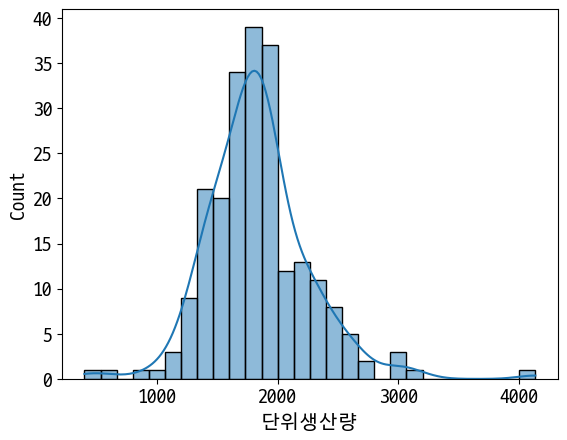

In [15]:
# df['단위생산량'].hist()
sns.histplot(df['단위생산량'], kde=True)
# plt.savefig('data/plotimg/hist_before.png')

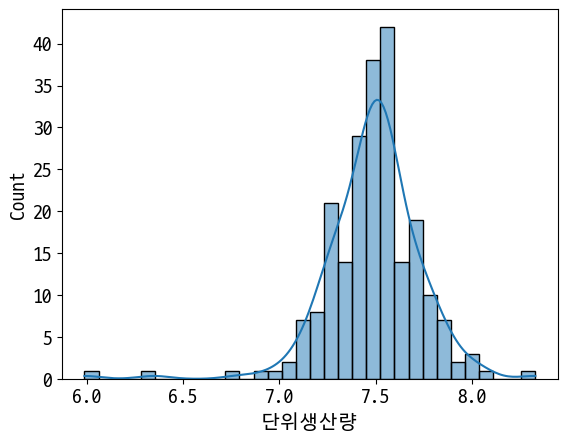

In [16]:
# y_log_transform = np.log1p(df['단위생산량'])
# y_log_transform.hist()
sns.histplot(np.log1p(df['단위생산량']), kde=True)
# plt.savefig('data/plotimg/hist_after.png')

In [9]:
ori_y = df['단위생산량']
# df['단위생산량'] = np.log1p(df['단위생산량'])
# 추후 결괏값을 expm1()으로 환원하여 실제 생산량으로!

# 컬럼별 영향력 시각화

In [10]:
df.drop(df[df['avg기온']==7.1].index, inplace=True)
df.drop(df[df['max기온']==32.7].index, inplace=True)

In [11]:
data = df[['단위생산량', 'avg기온', 'max기온', 'min기온',
         '강수량', '상대습도', 'min상대습도', '일조시간', 'avg풍속', 'max풍속',
         'sp_평균기온', 'sp_max기온', 'sp_min기온', 'sp_강수량',
         'su_평균기온', 'su_max기온', 'su_min기온', 'su_강수량',
         'fa_평균기온', 'fa_max기온', 'fa_min기온', 'fa_강수량']]

<AxesSubplot:>

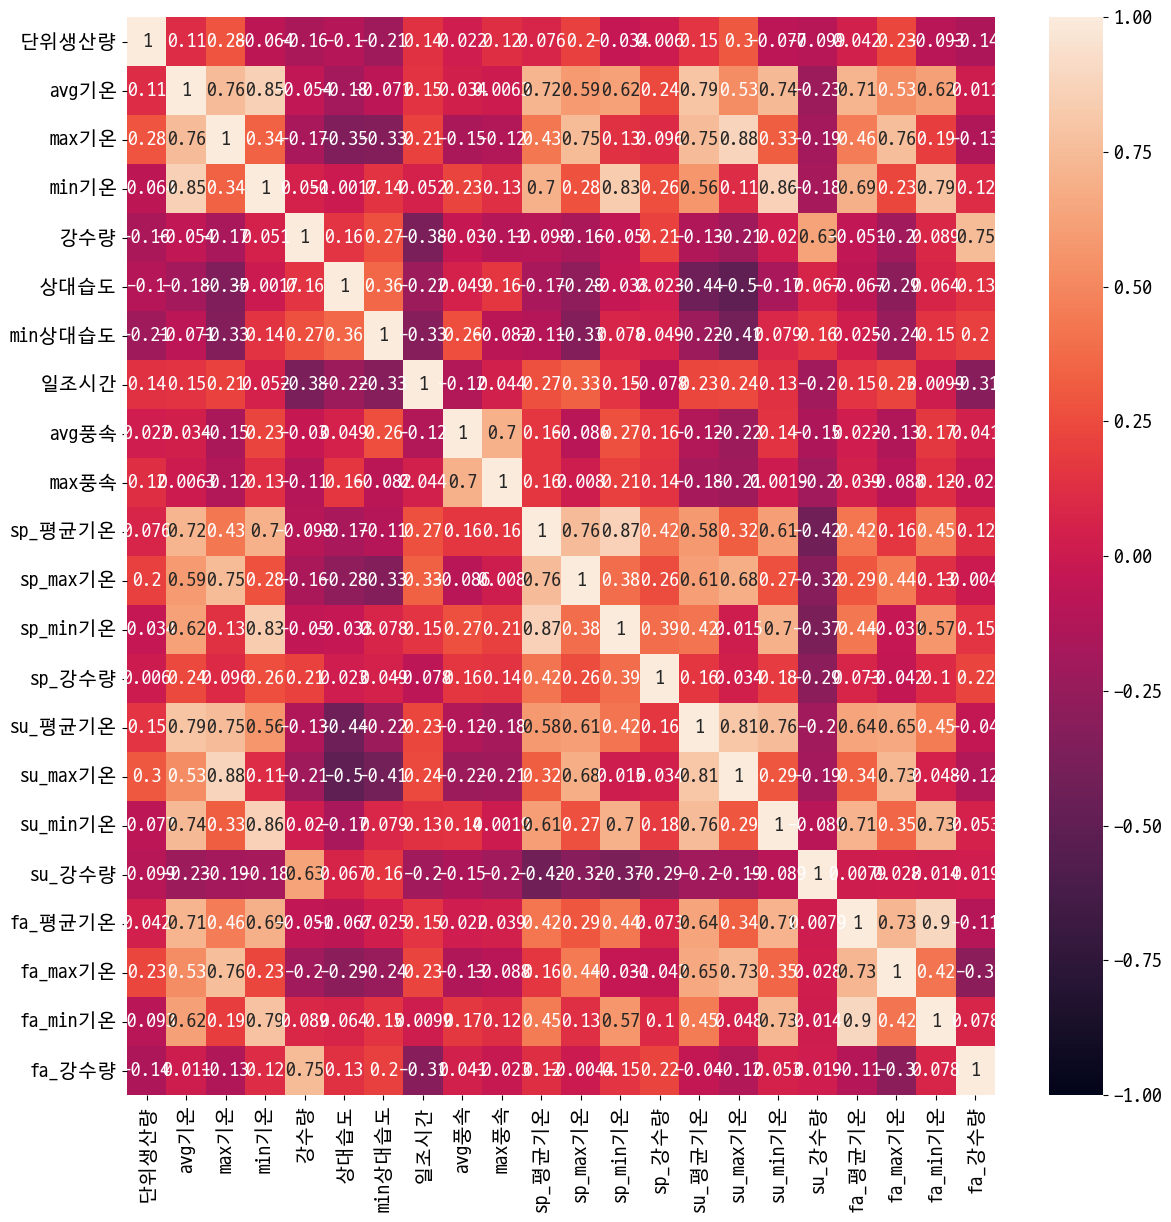

In [12]:
plt.figure(figsize=(14, 14))
corr = data.corr()
sns.heatmap(corr, annot=True, vmin=-1, vmax=1)

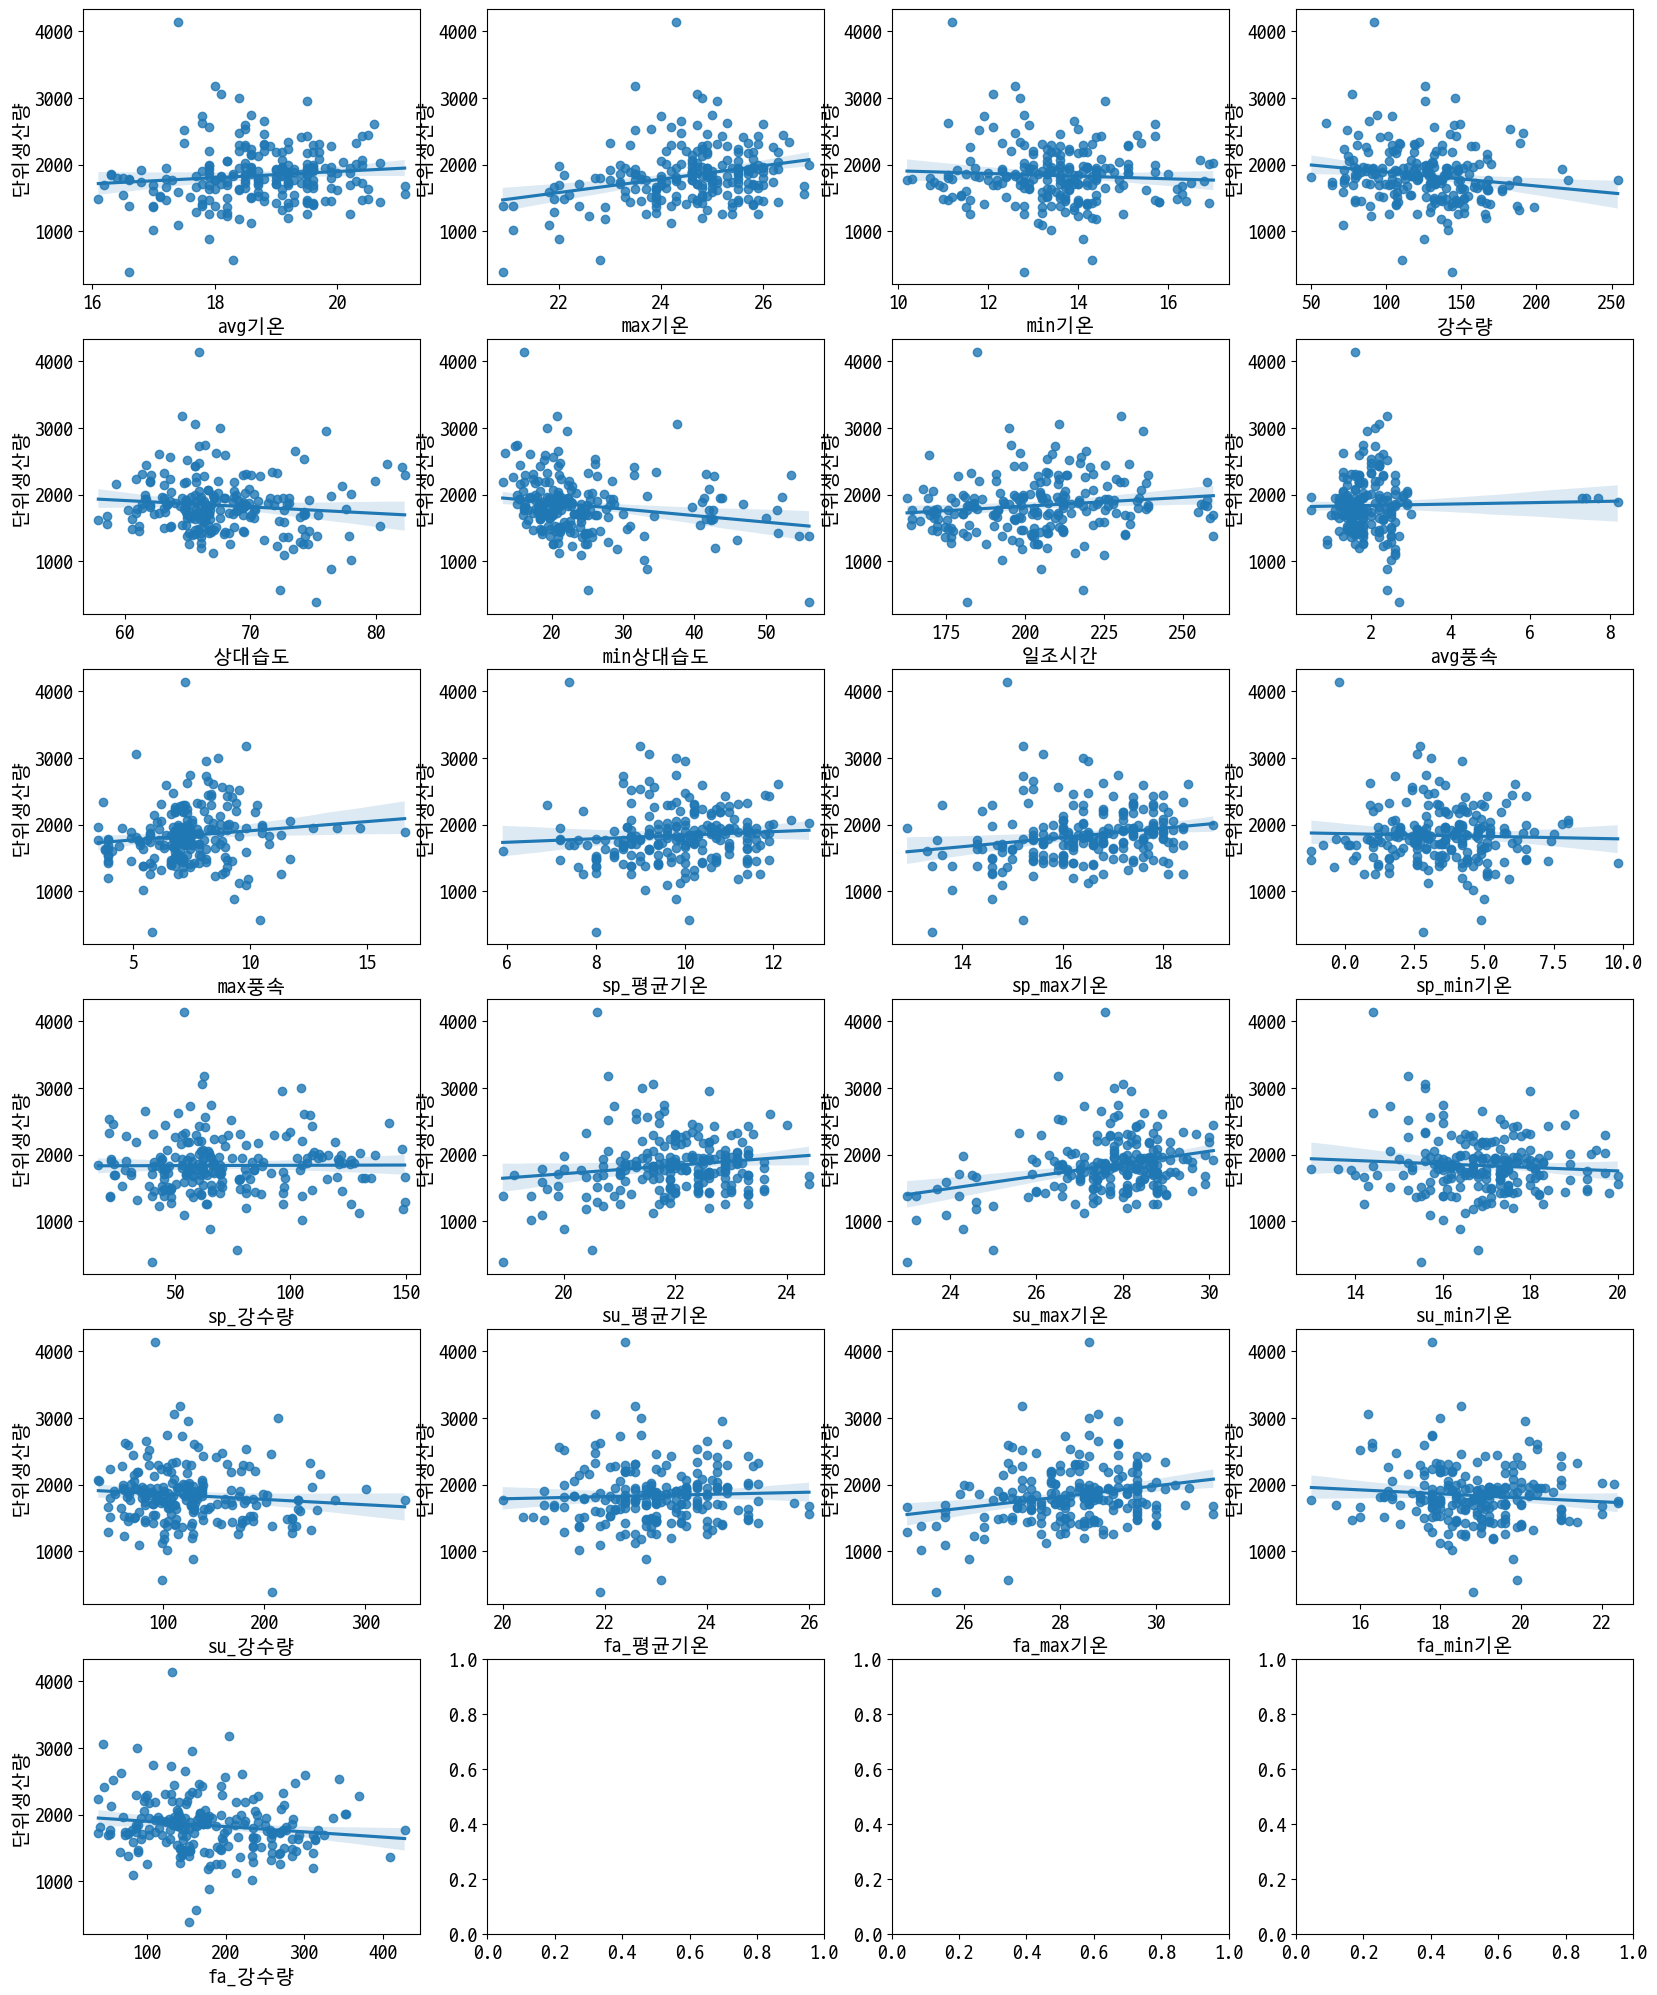

In [13]:
data_features = ['avg기온', 'max기온', 'min기온', '강수량',
                 '상대습도', 'min상대습도', '일조시간', 'avg풍속', 'max풍속',
                 'sp_평균기온', 'sp_max기온', 'sp_min기온', 'sp_강수량',
                 'su_평균기온', 'su_max기온', 'su_min기온', 'su_강수량',
                 'fa_평균기온', 'fa_max기온', 'fa_min기온', 'fa_강수량']
fig, axs = plt.subplots(figsize=(20, 25), ncols=4, nrows=6)
for i , feature in enumerate(data_features):
    row = int(i / 4)
    col = i % 4
    sns.regplot(x=feature, y='단위생산량', data=data, ax=axs[row][col])

## 이상치 데이터

In [14]:
data['avg기온'].sort_values(ascending=True)

93     16.1
56     16.2
101    16.3
100    16.3
97     16.4
       ... 
179    20.6
215    20.7
189    20.7
68     21.1
174    21.1
Name: avg기온, Length: 221, dtype: float64

In [15]:
df[df['avg기온']==7.1]

,년,대지역,소지역,단위생산량,avg기온,max기온,min기온,강수량,상대습도,min상대습도,...,sp_min기온,sp_강수량,su_평균기온,su_max기온,su_min기온,su_강수량,fa_평균기온,fa_max기온,fa_min기온,fa_강수량


In [16]:
data['max기온'].sort_values(ascending=False)

150    26.9
68     26.8
174    26.8
148    26.5
178    26.4
       ... 
137    21.8
48     21.1
134    21.1
47     20.9
133    20.9
Name: max기온, Length: 221, dtype: float64

In [17]:
df[df['max기온']==32.7]

,년,대지역,소지역,단위생산량,avg기온,max기온,min기온,강수량,상대습도,min상대습도,...,sp_min기온,sp_강수량,su_평균기온,su_max기온,su_min기온,su_강수량,fa_평균기온,fa_max기온,fa_min기온,fa_강수량


In [18]:
data.to_csv('data/done/ml_data.csv', encoding='cp949', index=False)